In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

C:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in test_data[8886]])
print(decoded_review)

? nice combination of the giant monster and samurai genres the giant monster ? god of the mountain is an ? and ? figure that comes across very much like the old testament god ? destruction and punishment on those who his holy ground but it's interesting to note that what finally ? him is not the suffering of the people but a pointed and personal insult it's beautifully photographed with solid acting great ? and a wonderful score by the great ? ? is not a 400 foot monster like godzilla he's 2 1 2 times normal size so the evil samurai he ? into the ground get a good look into his ? eyes as he bears down on their ? and ? it to ? not much in terms of extras but it's nice to see this forgotten minor classic rescued and restored to the digital format


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [13]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=4,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 7s 433us/step - loss: 0.4745 - acc: 0.7786 - val_loss: 0.3323 - val_acc: 0.8588
Epoch 2/4
15000/15000 [==============================] - 4s 294us/step - loss: 0.2418 - acc: 0.9020 - val_loss: 0.2960 - val_acc: 0.8759
Epoch 3/4
15000/15000 [==============================] - 4s 289us/step - loss: 0.1679 - acc: 0.9334 - val_loss: 0.3191 - val_acc: 0.8802
Epoch 4/4
15000/15000 [==============================] - 4s 290us/step - loss: 0.1444 - acc: 0.9435 - val_loss: 0.3141 - val_acc: 0.8807


In [15]:
history_dict = history.history
print(history_dict.keys())
acc=history_dict['acc']
val_acc=history_dict['val_acc']

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


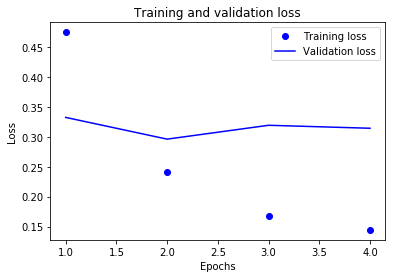

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

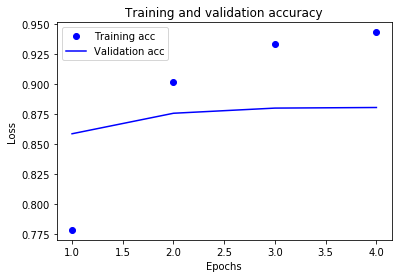

In [17]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 215us/step - loss: 0.1911 - acc: 0.9270
Epoch 2/4
25000/25000 [==============================] - 5s 203us/step - loss: 0.1467 - acc: 0.9425
Epoch 3/4
25000/25000 [==============================] - 5s 204us/step - loss: 0.1160 - acc: 0.9538
Epoch 4/4
25000/25000 [==============================] - 8s 323us/step


In [19]:
print(results)

[0.3863393431138992, 0.87004]


In [20]:
model.predict(x_test)

array([[0.02164094],
       [0.9990294 ],
       [0.73057187],
       ...,
       [0.08822065],
       [0.01737647],
       [0.9225194 ]], dtype=float32)

In [21]:
req_pred=8889
single_x_test=x_test[req_pred]
q = model.predict( np.array( [single_x_test,] )  )
print(q)
print(y_test[req_pred])

[[0.9671148]]
1.0


In [22]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [2]:
print(test_labels)

NameError: name 'test_labels' is not defined